# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

dataset_path="./dataset/"
training_file = dataset_path+"train.p"
validation_file = dataset_path+"valid.p"
testing_file = dataset_path+"test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(y_train.reshape([-1,1]))
ohe.n_values_, ohe.feature_indices_, ohe.active_features_
y_train_oh = ohe.transform(y_train.reshape([-1,1])).toarray()
y_valid_oh = ohe.transform(y_valid.reshape([-1,1])).toarray()
y_test_oh = ohe.transform(y_test.reshape([-1,1])).toarray()

y_train_oh = np.squeeze(np.asarray(y_train_oh))
#y_train_oh = np.asarray(y_train_oh)
#print(y_train_oh)
#print(y_train_oh.shape)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.asarray(X_train[0]).shape

# TODO: How many unique classes/labels there are in the dataset.
n_labels = []
def get_num_classes():
    for _ in train['labels']:
        if _ not in n_labels:
            n_labels.append(_)
    return len(n_labels)
n_classes = get_num_classes()
print("labels :", n_labels)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



labels : [41, 31, 36, 26, 23, 1, 40, 22, 37, 16, 3, 19, 4, 11, 42, 0, 32, 27, 29, 24, 9, 5, 38, 8, 10, 35, 34, 18, 6, 13, 7, 30, 39, 21, 20, 33, 28, 12, 14, 15, 17, 2, 25]
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Sample train images for each label


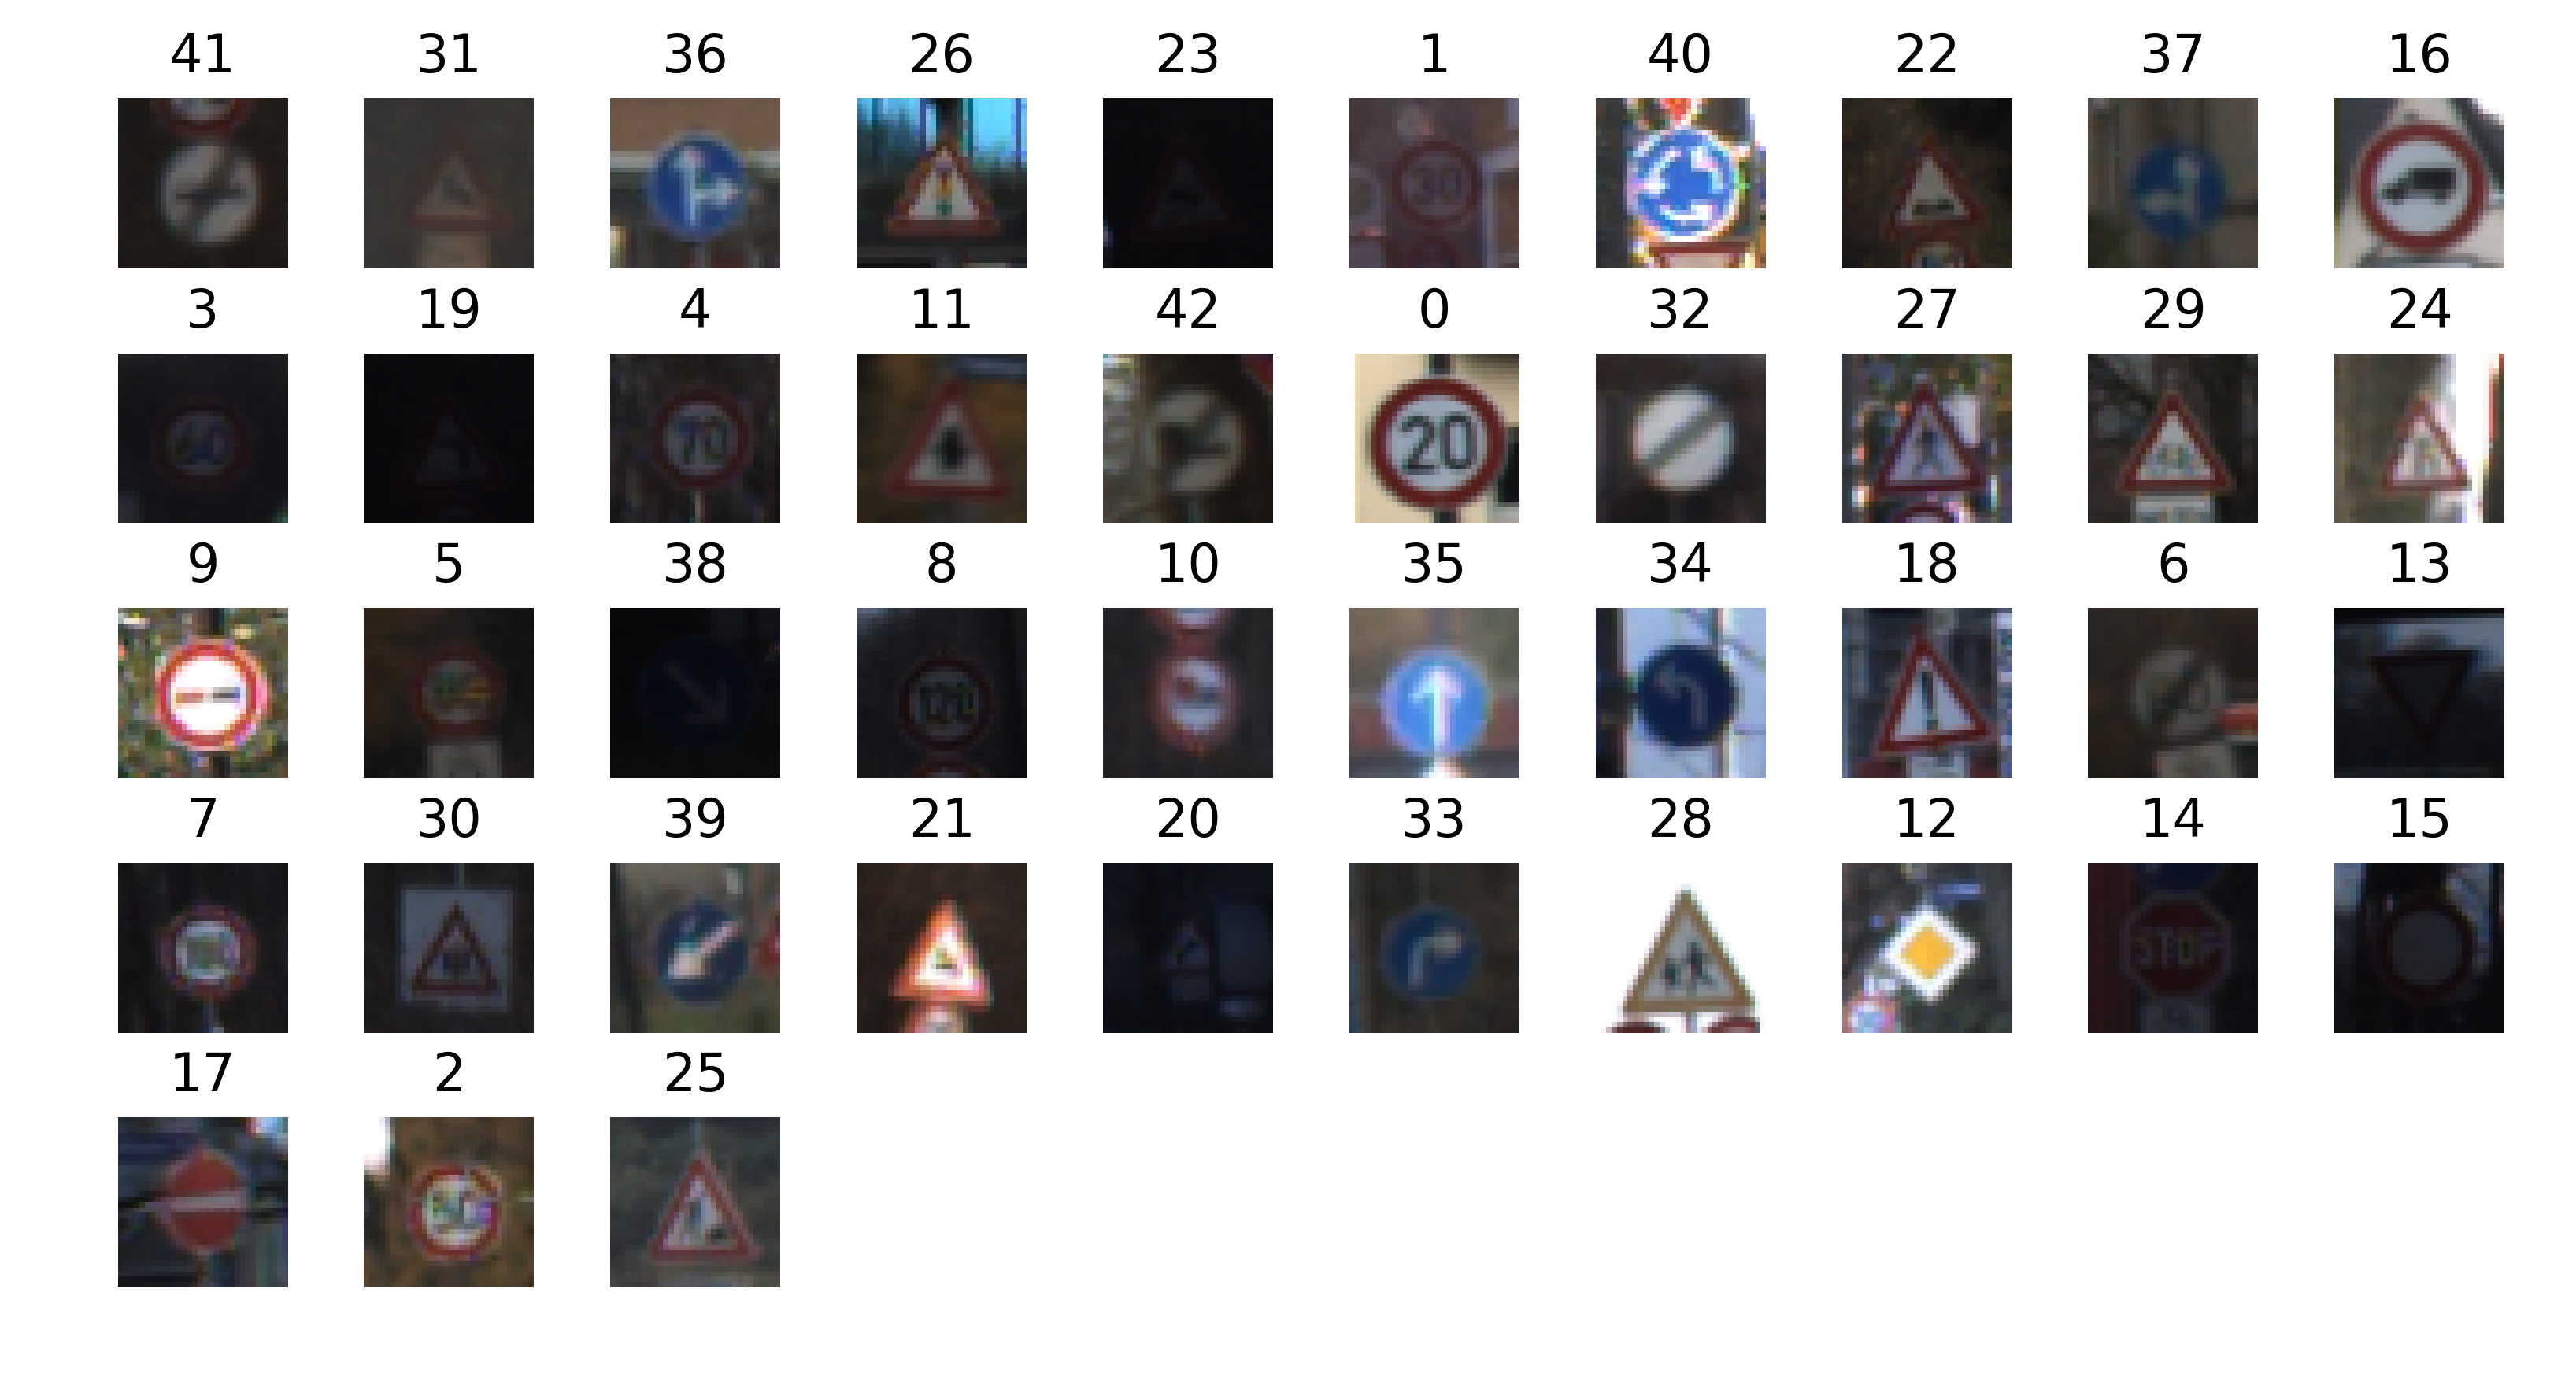

Histogram of labels


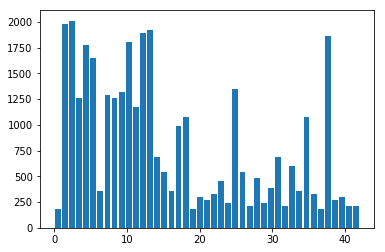



Sample test images for each label


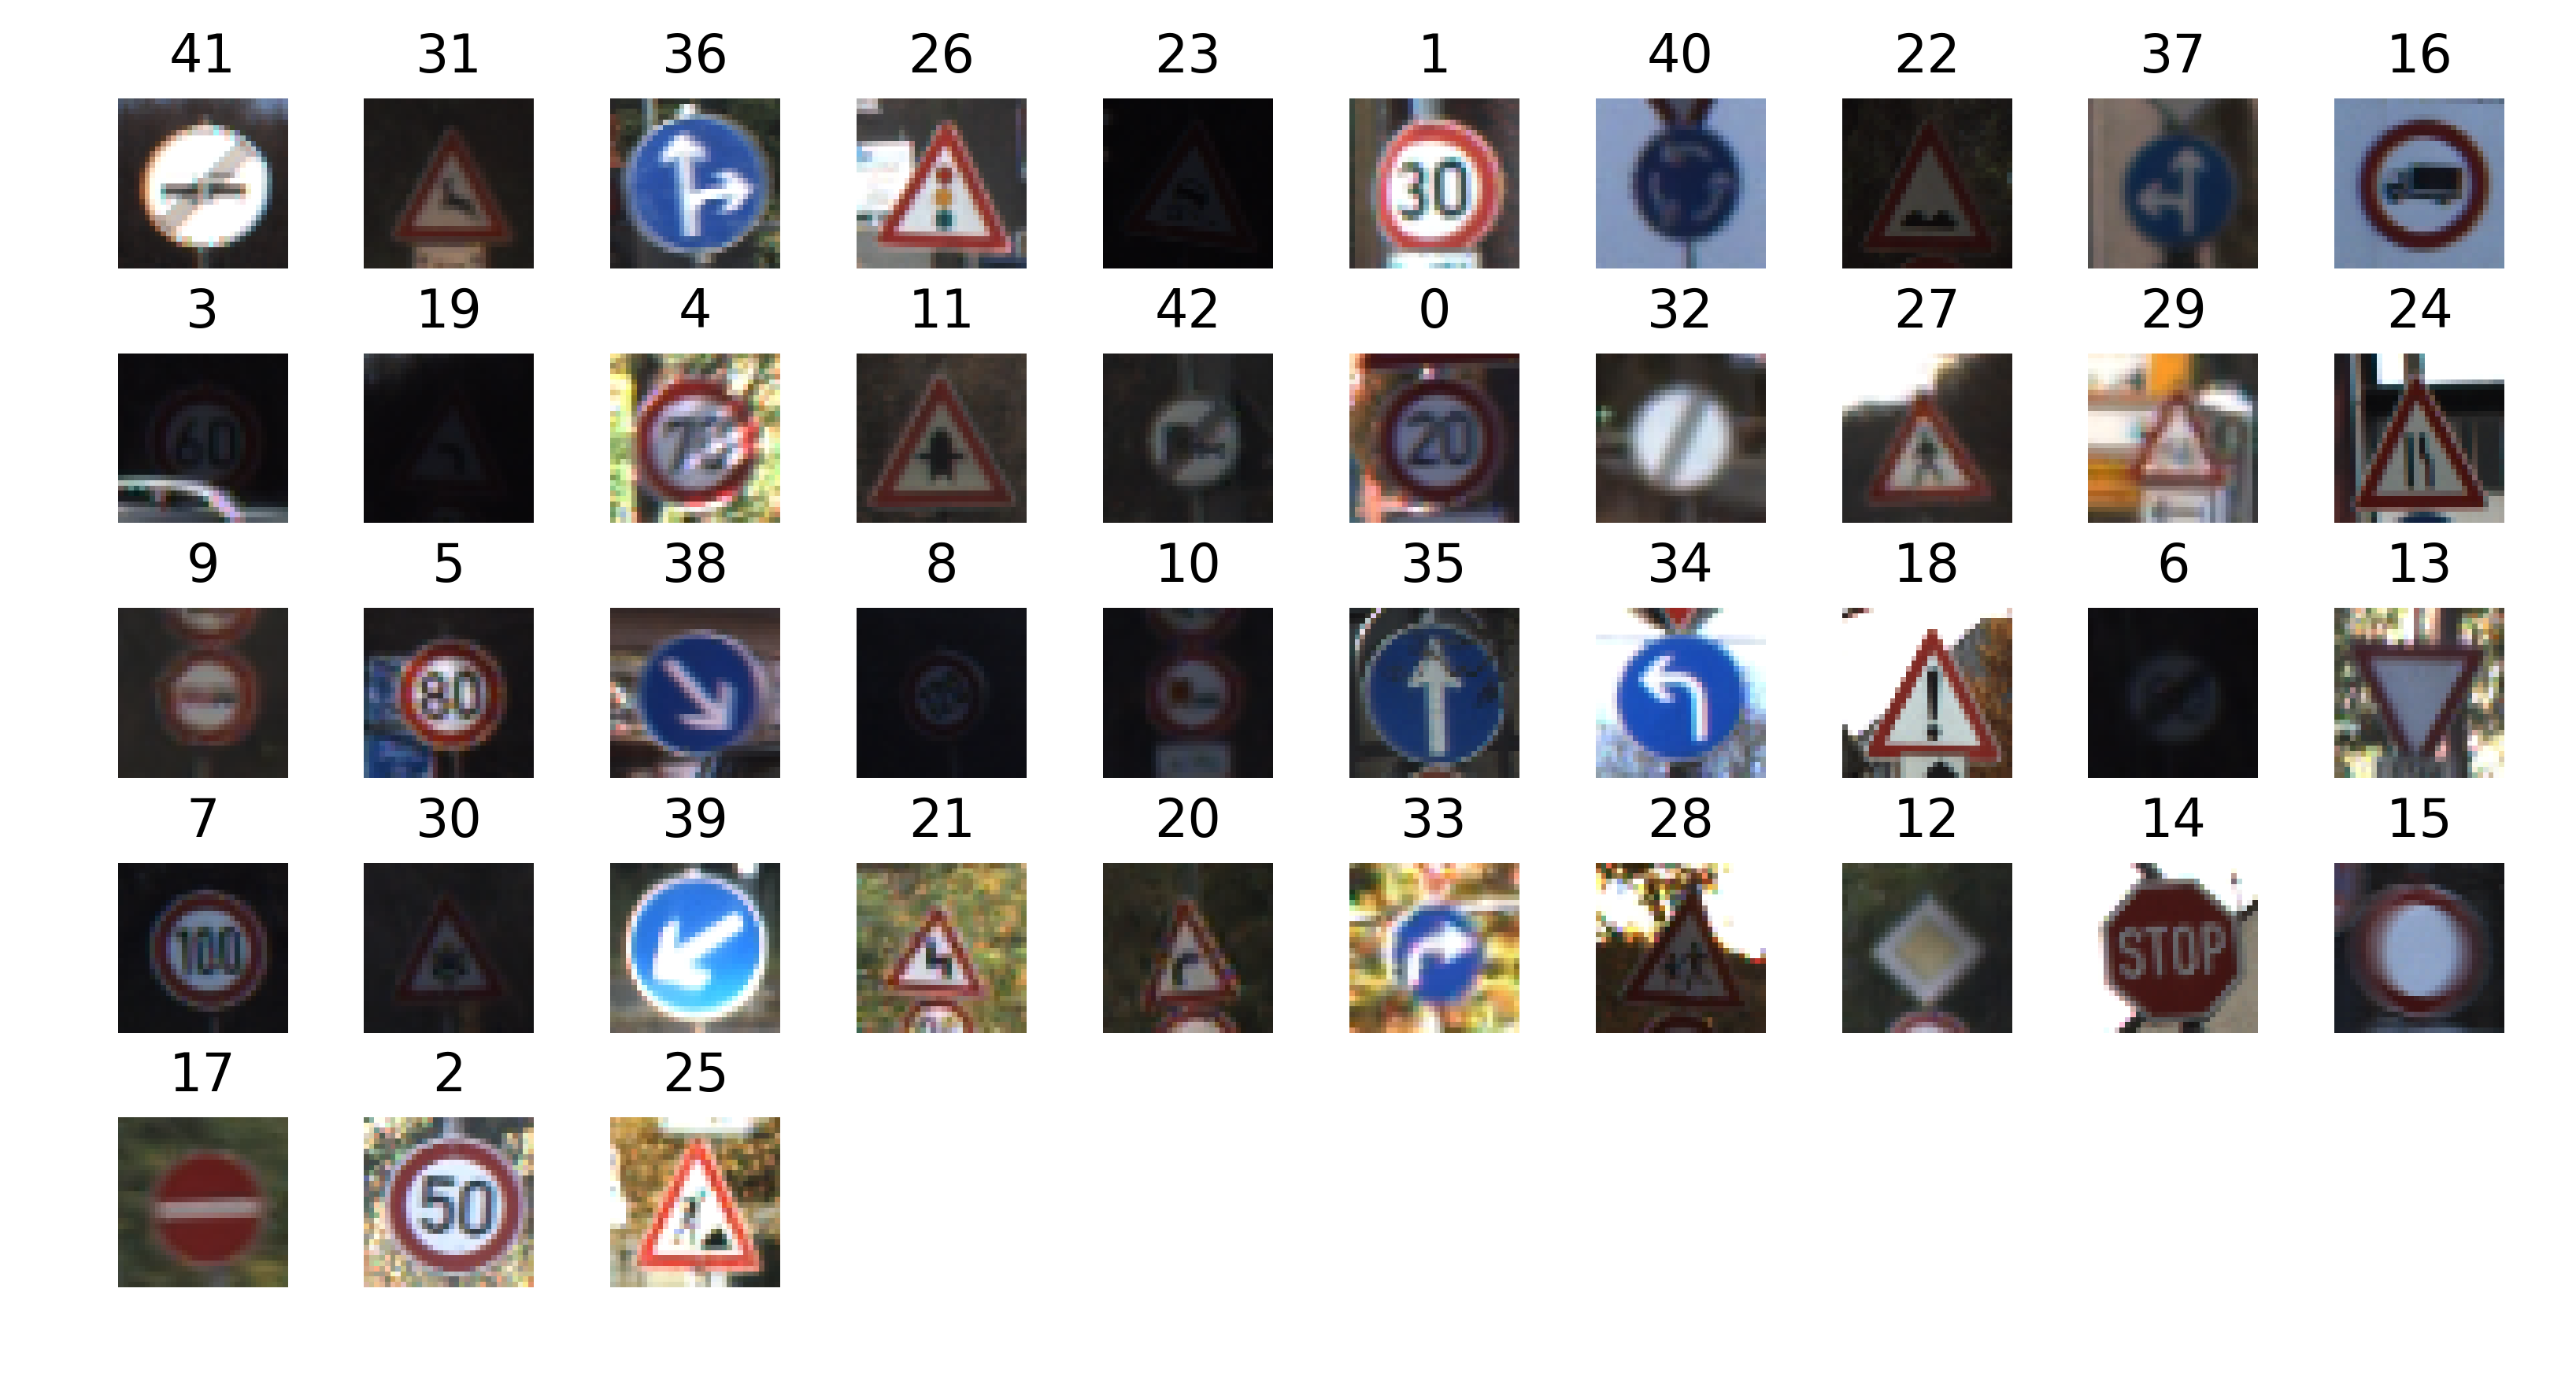

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# I will draw figures of one for each class, i.e. 'n_classes' figures.
figure_idx=np.empty([n_classes], dtype=np.int)
for i in range(n_classes):
    c = n_labels[i]
    for l in range(n_train):
        if y_train[l]==c:
            figure_idx[i]=l
            break
#print (figure_idx)

cols = 10
rows = int(n_classes/cols)+1
# print(cols, rows)
print("Sample train images for each label")
fig, ax = plt.subplots(rows, cols, figsize=(cols, rows), dpi=400)#, dpi=1200
fig.subplots_adjust(hspace = .5, wspace=.1)
# plt.tight_layout()
for i in range(rows):
    for k in range(cols):
        ax[i][k].set_axis_off()
        if (i*cols+k)<n_classes:
            ax[i][k].imshow(X_train[figure_idx[i*cols+k]])
            ax[i][k].set_title(y_train[figure_idx[i*cols+k]])
plt.show()
plt.close()

# histogram of labels
print("Histogram of labels")
hist, bins = np.histogram(train['labels'], bins=n_classes)
plt.bar((bins[:-1] + bins[1:])/2, hist,  align='center')
plt.show()
plt.close()



figure_idx_test=np.empty([n_classes], dtype=np.int)
for i in range(n_classes):
    c = n_labels[i]
    for l in range(n_train):
        if y_test[l]==c:
            figure_idx_test[i]=l
            break
print("\n\nSample test images for each label")
fig, ax = plt.subplots(rows, cols, figsize=(cols, rows), dpi=400)#, dpi=1200
fig.subplots_adjust(hspace = .5, wspace=.1)
# plt.tight_layout()
for i in range(rows):
    for k in range(cols):
        ax[i][k].set_axis_off()
        if (i*cols+k)<n_classes:
            ax[i][k].imshow(X_test[figure_idx_test[i*cols+k]])
            ax[i][k].set_title(y_test[figure_idx_test[i*cols+k]])
plt.show()
plt.close()

            
            

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# calculate mean w.r.t. channels (R,G,B)
mean = np.mean(X_train, axis=(0,1,2))
#print(mean)

# Preprocess --> normalize image pixel value between -1.0~1.0
def img_preprocess(img):
    return (img-mean)/128.
X_train = img_preprocess(X_train)
X_valid = img_preprocess(X_valid)
X_test = img_preprocess(X_test)
#print(X_train[0])

def img_restore(img):
    return int(img*128.+mean)

from sklearn.utils import shuffle
def shuffle_data(x, y):
    return shuffle(x, y)



### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
# Tested on tf version "0.12.1" and "1.4.0"
print("My tensorflow version : {}".format(tf.__version__))


#### I will use simple CNN 

##### Input place holders
# X for input image batch
X = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]), name='X')
# y for label batch
y = tf.placeholder(tf.float32, (None, n_classes), name='y')
# dropout to control dropout ratio
dropout = tf.placeholder(tf.float32, name='dropout')
# lr to fine-tune with lower learning rate
lr = tf.placeholder(tf.float32, name='learning_rate')

# base_depth to control depth of whole network
# Higher than '8' had not shown significant performance enhancement, 
# but just taken longer time to learn. 
base_depth = 8

##### conv_1 layers
# To extract features with series of 3x3 convolution filters. Three of them were enough
# Maintaing input size, only make depth deeper.
# Input : 32x32x3
# conv_1_1 out : 32x32x8
# conv_1_2 out : 32x32x16
# conv_1_3 out : 32x32x32
conv_1_weight   = tf.Variable(tf.truncated_normal([3, 3, 3, base_depth], mean=0.0, stddev=0.1))
conv_1_bias     = tf.Variable(tf.zeros(base_depth))
conv_1_1        = tf.nn.conv2d(X, conv_1_weight, [1,1,1,1], padding="SAME", name='conv_1') + conv_1_bias
conv_1_relu     = tf.nn.relu(conv_1_1) 

conv_1_2_weight = tf.Variable(tf.truncated_normal([3, 3, base_depth, base_depth*2], mean=0.0, stddev=0.1))
conv_1_2_bias   = tf.Variable(tf.zeros(base_depth*2))
conv_1_2        = tf.nn.conv2d(conv_1_relu, conv_1_2_weight, [1,1,1,1], padding="SAME", name='conv_1_2') + conv_1_2_bias
conv_1_2_relu   = tf.nn.relu(conv_1_2)

conv_1_3_weight = tf.Variable(tf.truncated_normal([3, 3, base_depth*2, base_depth*4], mean=0.0, stddev=0.1))
conv_1_3_bias   = tf.Variable(tf.zeros(base_depth*4))
conv_1_3        = tf.nn.conv2d(conv_1_2_relu, conv_1_3_weight, [1,1,1,1], padding="SAME", name='conv_1_3') + conv_1_3_bias
conv_1_3_relu   = tf.nn.relu(conv_1_3)

##### conv_1_3_pool layer
# First reduction in size
# Input : 32x32x32
# Output: 16x16x32
conv_1_3_pool   = tf.nn.max_pool(conv_1_3_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

##### conv_2 layers
# Convolution with 5x5 filter
# Empirically, 5x5 had shown better performance than 3x3
# With 5x5 filters and 'VALID' padding strategy, feature size reduces without pooling
# Input : 16x16x32
# Output: 12x12x64
conv_2_weight   = tf.Variable(tf.truncated_normal([5, 5, base_depth*4, base_depth*8], mean=0.0, stddev=0.1))
conv_2_bias     = tf.Variable(tf.zeros(base_depth*8))
conv_2          = tf.nn.conv2d(conv_1_3_pool, conv_2_weight, [1,1,1,1], padding="VALID", name='conv_2') + conv_2_bias
conv_2_relu     = tf.nn.relu(conv_2)

##### conv_3 layers  ( Same strategy as conv_2 )
# Convolution with 5x5 filter
# Empirically, 5x5 had shown better performance than 3x3
# With 5x5 filters and 'VALID' padding strategy, feature size reduces without pooling
# Input : 12x12x64
# Output: 8x8x128
conv_3_weight   = tf.Variable(tf.truncated_normal([5, 5, base_depth*8, base_depth*16], mean=0.0, stddev=0.1))
conv_3_bias     = tf.Variable(tf.zeros(base_depth*16))
conv_3          = tf.nn.conv2d(conv_2_relu, conv_3_weight, [1,1,1,1], padding="VALID", name='conv_3') + conv_3_bias
conv_3_relu     = tf.nn.relu(conv_3)

##### fc0 layers  
# Flatten and Dropout
# Not tested various value of dropout-ratio. 
# Only 0.5 and 0.8 I had tried, and these had shown not much difference in learning curve.
# Input : 8x8x128
# Output: 8192
fc0     = tf.contrib.layers.flatten(conv_3_relu)
fc0_dropout = tf.nn.dropout(fc0, dropout)

##### fc1, fc2, fc3 layers  
# Fully connection to extract logits
# Decreased in three steps, rather than directly extracting
# Size of fc1 was sensitive to the accurary. With smaller, significantly lower accurary.
# Input : 8192
# fc1 output: 1024
# fc2 output: 256
# fc3 output: 43 (The number of classes)
fc1_w   = tf.Variable(tf.truncated_normal([8*8*base_depth*16, 1024], mean=0.0, stddev=0.1))
fc1_b   = tf.Variable(tf.zeros(1024))
fc1     = tf.matmul(fc0, fc1_w) + fc1_b

fc2_w = tf.Variable(tf.truncated_normal([1024, 256], mean=0.0, stddev=0.1))
fc2_b = tf.Variable(tf.zeros(256))
fc2   = tf.matmul(fc1, fc2_w) + fc2_b

fc3_w = tf.Variable(tf.truncated_normal([256, n_classes], mean=0.0, stddev=0.1))
fc3_b = tf.Variable(tf.zeros(n_classes))
logits = tf.matmul(fc2, fc3_w) + fc3_b


##### Cross entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)

##### L2 Regularizer
regular = tf.nn.l2_loss(conv_1_weight) + tf.nn.l2_loss(conv_1_2_weight) + tf.nn.l2_loss(conv_1_3_weight) + \
          tf.nn.l2_loss(conv_2_weight) + tf.nn.l2_loss(conv_3_weight) + tf.nn.l2_loss(fc1_w) + \
          tf.nn.l2_loss(fc2_w) + tf.nn.l2_loss(fc3_w)
        
##### Loss
loss = tf.reduce_mean(cross_entropy) + 0.0001*regular

##### Optimizer and Training step
##### RMSProp and Adam had shown better, than normal Gradient Descent
train_step = tf.train.AdamOptimizer(lr).minimize(loss) 


My tensorflow version : 0.12.1


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

epoch = 35
batch_size = 32
num_batch = int(n_train/batch_size)
#print(num_batch)

def eval(sess, _X, _y):
    prediction = tf.nn.softmax(logits)
    is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

    eval_size = len(_X)
    acc = 0.
    num_data=0
    for i in range(0, eval_size, batch_size):
        start = i
        end = start+batch_size
        X_this_batch = _X[start:end]
        y_this_batch = _y[start:end]
        this_acc = sess.run(accuracy, feed_dict={X: X_this_batch, y: y_this_batch, dropout:1.0})
        acc += (this_acc * len(X_this_batch))
        #num_data+=len(X_this_batch)
    #print( eval_size, num_data )
    return acc / eval_size


epoch = 35
batch_size = 32
num_batch = int(n_train/batch_size)
#print(num_batch)
prediction = tf.nn.softmax(logits)
    
def eval(sess, _X, _y):
    is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

    eval_size = len(_X)
    acc = 0.
    num_data=0
    for i in range(0, eval_size, batch_size):
        start = i
        end = start+batch_size
        X_this_batch = _X[start:end]
        y_this_batch = _y[start:end]
        this_acc = sess.run(accuracy, feed_dict={X: X_this_batch, y: y_this_batch, dropout:1.0})
        acc += (this_acc * len(X_this_batch))
        #num_data+=len(X_this_batch)
    #print( eval_size, num_data )
    return acc / eval_size

saver = tf.train.Saver()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
base_lr = 0.0005
for e in range(epoch):
    this_lr = base_lr
    if e>40:
        this_lr = this_lr*0.1
    if e>70:
        this_lr = this_lr*0.1

    shuffled_X, shuffled_y = shuffle_data(X_train, y_train_oh)
    for i in range(num_batch):
        start = i*batch_size
        end = start+batch_size
        X_this_batch = shuffled_X[start:end]
        y_this_batch = shuffled_y[start:end]
        # _, this_loss = sess.run([train_step, loss], feed_dict={X:X_this_batch, y:y_this_batch})
        sess.run(train_step, feed_dict={X:X_this_batch, y:y_this_batch, dropout:0.8, lr:this_lr})
    this_loss, reg = sess.run([loss,regular], feed_dict={X:X_this_batch, y:y_this_batch, dropout:1.0})
    print("epoch : {}".format(e), "batch: {}".format(i), "Loss : {}".format(this_loss), "L2 Reg : {}".format(reg))
    val_accuracy = eval(sess, X_valid, y_valid_oh)
    print("validation accuracy : {}".format(val_accuracy))
test_accuracy =eval(sess, X_test, y_test_oh)
print("test accuracy : {}".format(test_accuracy))
train_accuracy =eval(sess, X_train, y_train_oh)
print("train accuracy : {}".format(train_accuracy))
saver.save(sess, 'train_data')    

epoch : 0 batch: 1086 Loss : 2.72676682472229 L2 Reg : 27180.40625
validation accuracy : 0.9356009070835416
epoch : 1 batch: 1086 Loss : 1.978891134262085 L2 Reg : 19728.119140625
validation accuracy : 0.9321995463230712
epoch : 2 batch: 1086 Loss : 1.3382771015167236 L2 Reg : 13307.6904296875
validation accuracy : 0.9564625848718241
epoch : 3 batch: 1086 Loss : 0.8564323782920837 L2 Reg : 8330.44140625
validation accuracy : 0.9467120181676212
epoch : 4 batch: 1086 Loss : 0.503147304058075 L2 Reg : 5026.8818359375
validation accuracy : 0.9707482993467594
epoch : 5 batch: 1086 Loss : 0.32708942890167236 L2 Reg : 3255.94970703125
validation accuracy : 0.9619047617696039
epoch : 6 batch: 1086 Loss : 0.23610380291938782 L2 Reg : 2335.453125
validation accuracy : 0.9553287981859411
epoch : 7 batch: 1086 Loss : 0.1800745129585266 L2 Reg : 1790.3955078125
validation accuracy : 0.9605442177141064
epoch : 8 batch: 1086 Loss : 0.151683509349823 L2 Reg : 1493.7532958984375
validation accuracy : 0

'train_data'

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Sample images from web



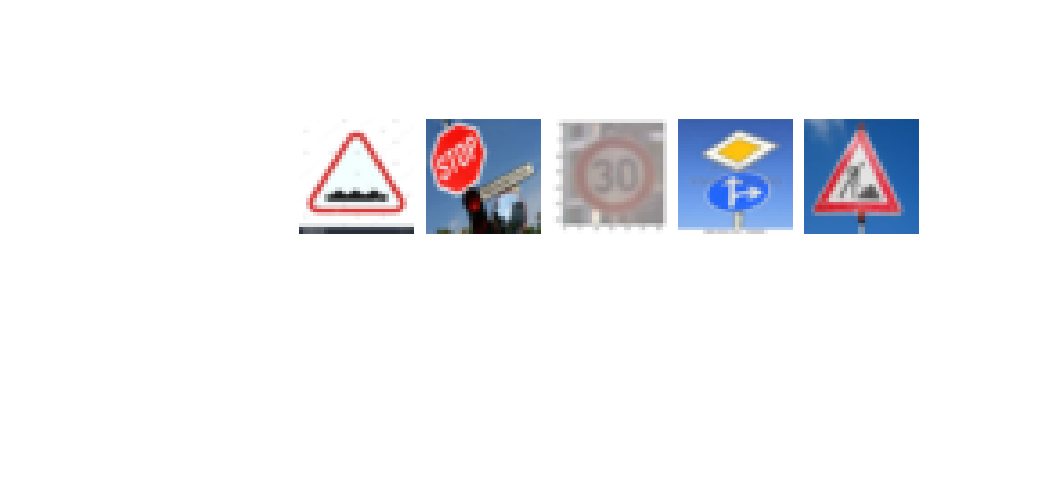

In [7]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import glob
import scipy

def read_image(file, scale_w=0, scale_h=0):
    img = scipy.misc.imread(file, mode='RGB').astype(np.float32)
    if (scale_w*scale_h):
        img = scipy.misc.imresize(img, [scale_w, scale_h])
    return img

img_path="./web_image/"
img_file_list = glob.glob(os.path.join(img_path, '*.jpg'))
#print (img_file_list)
num_img = len(img_file_list)

img_data=[]
for name in img_file_list:
    img=read_image(name,32,32)
    img_data.append(img)

print("Sample images from web\n")
fig, ax = plt.subplots(1, num_img, figsize=(1, num_img), dpi=800)
fig.subplots_adjust(hspace = .5, wspace=.1)
for k in range(num_img):
    ax[k].set_axis_off()
    ax[k].imshow(img_data[k])
plt.show()
plt.close()
            


### Predict the Sign Type for Each Image

In [8]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
prediction = tf.nn.softmax(logits)
 
img_prediction = sess.run(prediction, feed_dict={X: img_preprocess(img_data), y: y_this_batch, dropout:1.0})
label_prediction = np.argmax(img_prediction, axis=1)
sum_prediction = np.sum(img_prediction, axis=1)
for i in range(num_img):
    print ("label : {}".format(label_prediction[i]), \
           "confidence : {}".format(img_prediction[i][label_prediction[i]]/sum_prediction[i]))



label : 15 confidence : 0.8919963240623474
label : 12 confidence : 0.4545055627822876
label : 1 confidence : 1.0
label : 36 confidence : 0.9182044863700867
label : 25 confidence : 0.9996360540390015


### Analyze Performance

In [9]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Accuracy : 0.8")
print("Confidence values show great result except for 'Stop sign', let's see how confident for 'Stop' rather than 'General sign'")
print("Original lable : {} , but 'Stop' should be 14".format(label_prediction[1]), \
       "\nconfidence for the evaluated label : {}".format(img_prediction[1][label_prediction[1]]/sum_prediction[1]), \
       "\nconfidence for Stop Sign : {}".format(img_prediction[1][14]/sum_prediction[1]))
print("The confidence value for 'Stop' label is awfully low.")
print("Maybe, I need to augment data for translation invariance.")


Accuracy : 0.8
Confidence values show great result except for 'Stop sign', let's see how confident for 'Stop' rather than 'General sign'
Original lable : 12 , but 'Stop' should be 14 
confidence for the evaluated label : 0.4545055627822876 
confidence for Stop Sign : 2.0669115201599197e-06
The confidence value for 'Stop' label is awfully low.
Maybe, I need to augment data for translation invariance.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.



Image


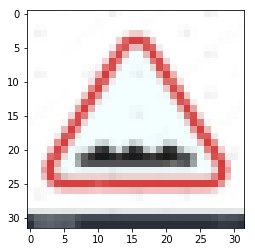

label : 15 Confidence : 0.89200
label : 22 Confidence : 0.10738
label : 32 Confidence : 0.00038
label : 1 Confidence : 0.00016
label : 29 Confidence : 0.00007


Image


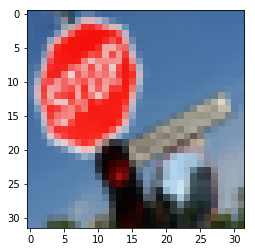

label : 12 Confidence : 0.45451
label : 11 Confidence : 0.29028
label : 20 Confidence : 0.09231
label : 27 Confidence : 0.05661
label : 6 Confidence : 0.04456


Image


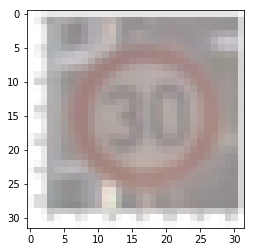

label : 1 Confidence : 1.00000
label : 4 Confidence : 0.00000
label : 0 Confidence : 0.00000
label : 5 Confidence : 0.00000
label : 32 Confidence : 0.00000


Image


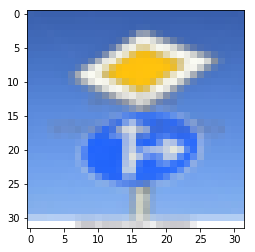

label : 36 Confidence : 0.91820
label : 38 Confidence : 0.06058
label : 5 Confidence : 0.00939
label : 41 Confidence : 0.00309
label : 20 Confidence : 0.00246


Image


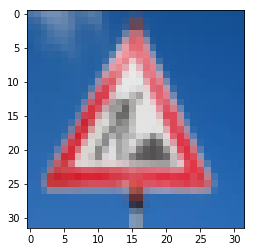

label : 25 Confidence : 0.99964
label : 31 Confidence : 0.00033
label : 29 Confidence : 0.00003
label : 14 Confidence : 0.00001
label : 22 Confidence : 0.00000


In [10]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_5 = tf.nn.top_k(img_prediction, k=5)
t5_val, t5_idx = sess.run(top_5)

for i in range(num_img):
    print("\n\nImage")
    plt.imshow(img_data[i])
    plt.show()
    for k in range(5):
        print("label : {}".format(t5_idx[i][k]), \
              "Confidence : %1.5f" % (img_prediction[i][t5_idx[i][k]]/sum_prediction[i]))
#print(t5_val, t5_idx)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")